# Welcome to the MLB Playoff Win Predictor
Let\'s see what is the most impactful single factor to a team in winning games in the postseason of Baseball

## Abstract
I will viewing at a number of telling statistics and trying to find one that has a strong correlation to playoff wins. While fully explaining the importance of these single statistics for the team and how they might contribute to a team's success in the playoffs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
batting24 = pd.read_csv("Data/Batting24.csv")
fielding24 = pd.read_csv("Data/Fielding24.csv")
relief24 = pd.read_csv("Data/Relief24.csv")
salaries24 = pd.read_csv("Data/Salaries24.csv")
starting24 = pd.read_csv("Data/Starting24.csv")
batting24 = batting24.rename(columns = {'Tm':'Team'})
fielding24 = fielding24.rename(columns = {'Tm':'Team'})
relief24 = relief24.rename(columns = {'TEAM':'Team'})
starting24 = starting24.rename(columns = {'TEAM':'Team'})

def standarize_teams(team):
    return team[team.index('\n')+1:]
relief24['Team'] = relief24['Team'].apply(standarize_teams)
starting24['Team'] = starting24['Team'].apply(standarize_teams)

fielding24 = fielding24[['Team', 'Rtot', 'Rdrs' ]].rename(columns = {'Rtot' : 'Total Zone', 'Rdrs' : "Defensive Runs Saved"})
batting24 = batting24[['Team', 'HR', 'OPS' ]].rename(columns = {'HR' : 'Home Runs', 'OPS' : "On Base Plus Slugging"})
starting24 = starting24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Starting Pitchers WHIP", "ERA" : "Starting Pitchers ERA"})
relief24 = relief24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Relief Pitchers WHIP", "ERA" : "Relief Pitchers ERA"})
salaries24 = salaries24[['Team', 'Total PayrollAllocations']].rename(columns = {'Total PayrollAllocations' : 'Team Salary'})
def mergetopia(dfs):
    totalmerge = dfs[0]
    for i in range(1, len(dfs)):
        totalmerge = pd.merge(totalmerge, dfs[i])
    return totalmerge
Team_Data24 = mergetopia([fielding24, batting24, starting24, relief24, salaries24])
Team_Data24

,Team,Total Zone,Defensive Runs Saved,Home Runs,On Base Plus Slugging,Starting Pitchers WHIP,Starting Pitchers ERA,Relief Pitchers WHIP,Relief Pitchers ERA,Team Salary
0,Arizona Diamondbacks,-11,13,211,0.777,1.34,4.79,1.37,4.41,"$178,306,829"
1,Atlanta Braves,10,35,213,0.724,1.20,3.58,1.18,3.32,"$238,433,901"
2,Baltimore Orioles,-21,1,235,0.751,1.24,3.77,1.23,4.22,"$110,835,494"
3,Boston Red Sox,28,49,194,0.741,1.19,3.81,1.34,4.39,"$188,537,445"
4,Chicago Cubs,12,37,170,0.710,1.22,3.77,1.29,3.81,"$232,067,975"
5,Chicago White Sox,-81,-87,133,0.618,1.36,4.62,1.53,4.73,"$140,497,547"
6,Cincinnati Reds,8,-30,174,0.693,1.23,4.09,1.28,4.09,"$102,254,855"
7,Cleveland Guardians,37,89,185,0.703,1.32,4.40,1.05,2.57,"$105,224,582"
8,Colorado Rockies,-7,20,179,0.704,1.50,5.54,1.55,5.41,"$146,100,965"
9,Detroit Tigers,38,50,162,0.685,1.19,3.69,1.14,3.55,"$96,971,614"


Now we have completeley merged the 5 csv files that I gathers earlier into one Clean Dataset with all the teams in 2024 and their team statistics that I see as valuable variables that could contribute to a team winning more playoff wins. Now we have to merge a columns of playoffs wins that each of these teams had and see how these statistics measure up.

TypeError: can only concatenate str (not "float") to str

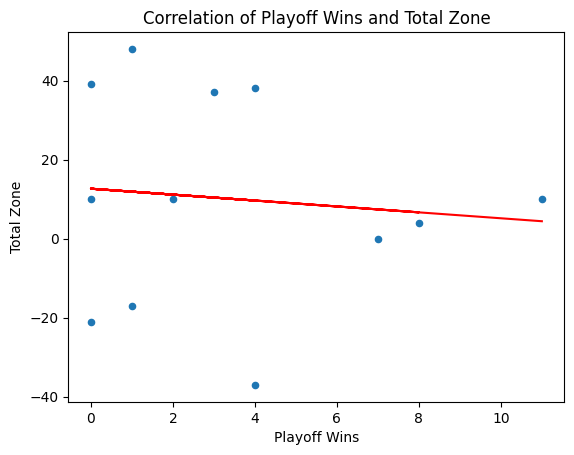

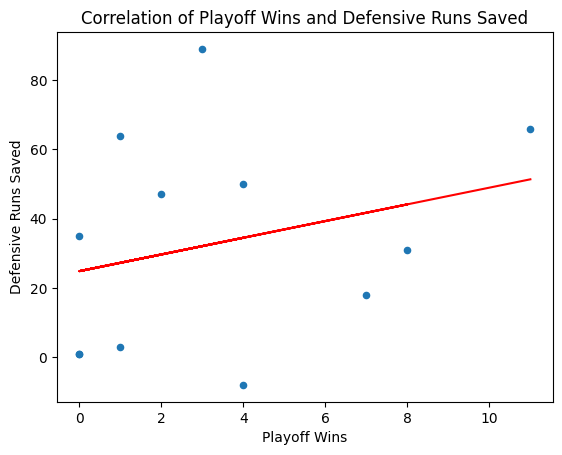

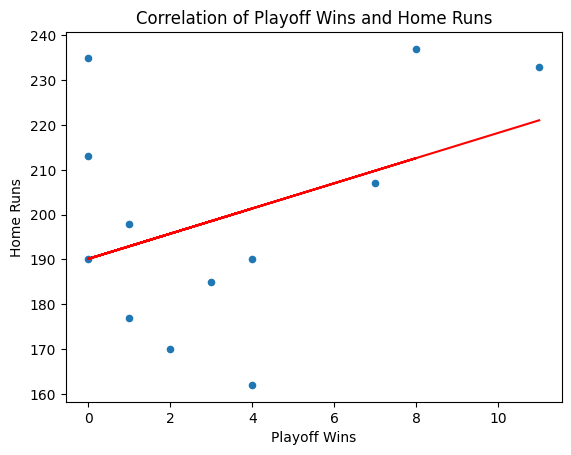

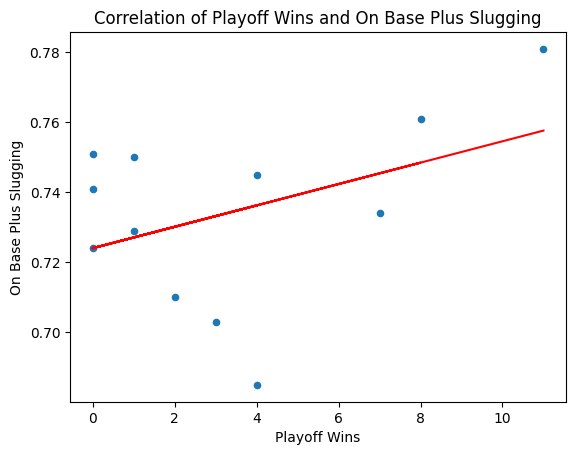

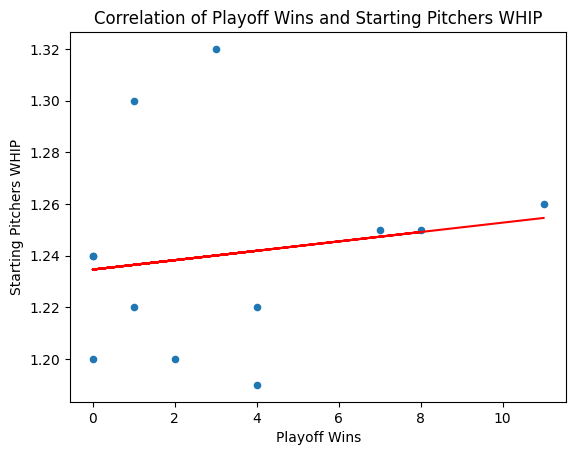

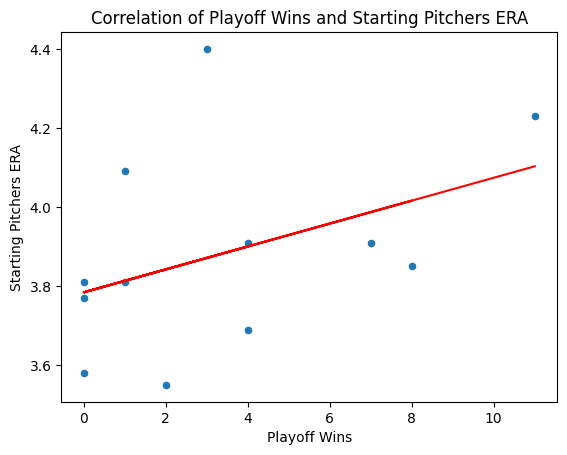

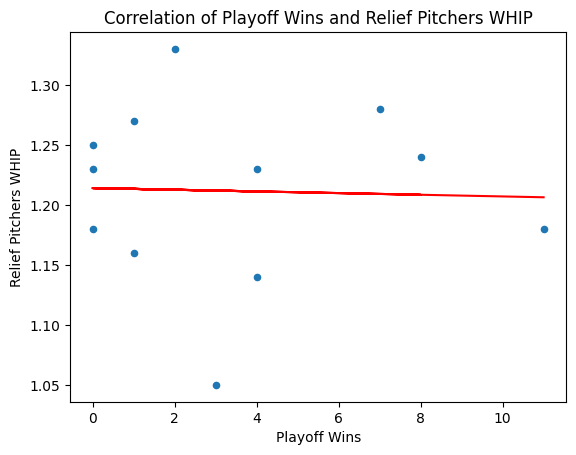

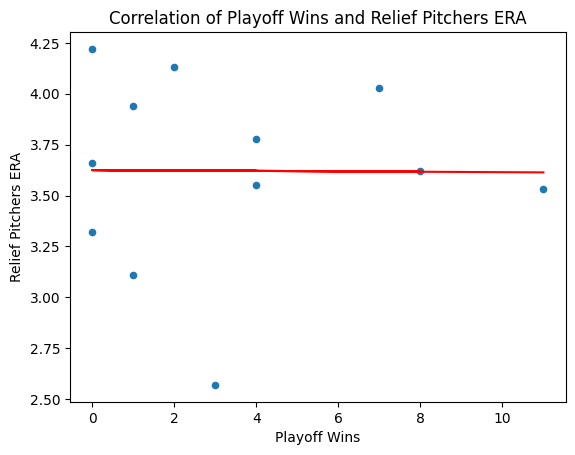

In [64]:
playoff_wins24 = pd.DataFrame({'Team' : ["Detroit Tigers", "Houston Astros", "Kansas City Royals", "Baltimore Orioles", "Cleveland Guardians", "New York Yankees", "New York Mets", "Philadelphia Phillies", "Milwaukee Brewers", "San Diego Padres", "Atlanta Braves", "Los Angeles Dodgers"], "Playoff Wins" : [4, 0, 2, 0, 3, 8, 7, 1, 1, 4, 0, 11]})
postseason_data24 = pd.merge(playoff_wins24, Team_Data24)
cols  = postseason_data24.columns
for i in range(2, len(cols)):
    a, b = np.polyfit(postseason_data24['Playoff Wins'], postseason_data24[cols[i]], 1) 
    postseason_data24.plot.scatter(x = 'Playoff Wins', y = cols[i])
    plt.plot(postseason_data24['Playoff Wins'], a * postseason_data24['Playoff Wins'] + b, color='red', label='Line of Best Fit')
    plt.title(f"Correlation of Playoff Wins and {cols[i]}")
    #np.polyfit(postseason_data24['Playoff Wins'], postseason_data24[cols[i]], deg = 1)
    #sns.regplot(x = 'Playoff Wins', y = cols[i], data =)



